### Multi-Class Classification of Accident Severity Using Traffic Accident data from United States of America



### MSC Artificial Intelligence with Data Analytics

***

### Name: Princess Chinemerem Iloh 



### Student ID: B1397468

***

### Dataset 

The data for this project was obtained from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents  

***

### Overview

The notebook is divided into the following sections:

        •	Importing Libraries and Dependencies
        •	Importing the Dataset
        •	Data Exploration
        •	Data Cleaning
        •	Explanatory Data Analysis{EDA}
        •	Data Pre-processing
        •	Machine Learning Model Building

## 1. Importing Libraries and Dependencies

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Importing the Dataset

In [2]:
data= pd.read_csv("C:\\Users\\Home\\OneDrive - Teesside University\Machine Learning\\US_Accidents_Dec21_updated.csv\\US_Accidents_Dec21_updated.csv")

## 3. Data Exploration

In [3]:
#Checking the first 5 Rows of the dataset
data.head(7)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-6,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
#Checking the last 5 Rows of the dataset
data.tail(7)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2845335,A-2845336,2,2019-08-23 17:43:56,2019-08-23 18:12:27,33.741700,-117.837090,33.739170,-117.830010,0.443,At CA-55 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845336,A-2845337,2,2019-08-23 18:30:23,2019-08-23 18:58:54,34.239104,-118.416176,34.239104,-118.416176,0.000,At Osborne St/Exit 154 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845341,A-2845342,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.133930,-117.230920,34.137360,-117.239340,0.537,At Highland Ave/Arden Ave - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
#checking for the number of rows and columns in the dataset
data.shape
print('There are a total of {} rows and {} columns in the original dataset'.format(data.shape[0],data.shape[1]))

There are a total of 2845342 rows and 47 columns in the original dataset


In [6]:
#information on each attibute and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
#Statistical description of the data (Count,Mean,std,min,25%,50%,75% and max)
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
#Checking for the column names in the dataset
data.columns
print('Column names in the dataset are: \n{}'.format(('\n').join(data.columns)))

Column names in the dataset are: 
ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [9]:
# Checking for the Data types contained in the dataset
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))

The dataset contains 4 different data types and they are: int64, object, bool, float64


## 4. Data Cleaning

In [10]:
#Are there null values?
print("Are there null values in the original dataset?: {}".format(data.isnull().values.any()))

Are there null values in the original dataset?: True


In [11]:
# displaying how many null values in each column
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [12]:
#displaying the percentage of the null values in each column
percent_missing=data.isnull().sum()* 100 / len(data)
percent_missing.sort_values(ascending=False)

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

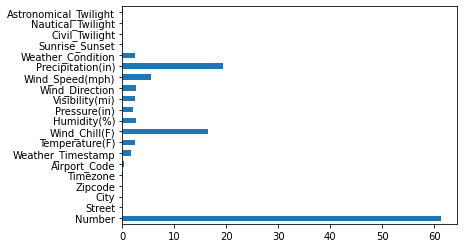

In [13]:
#Visualizing the missing values
percent_missing[percent_missing != 0].plot(kind='barh')

In [14]:
#dropping columns that are almost 20% missing
data.drop(['Number','Wind_Chill(F)','Precipitation(in)'], axis=1,inplace=True)


In [15]:

## dropping all the rows that are null
data.dropna(axis=0, how='any',inplace=True)

In [16]:
#Checking if the data is clean
data.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [17]:
#checking for the number of rows and columns in the new dataset
data.shape
print('There are a total of {} rows and {} columns in the new dataset'.format(data.shape[0],data.shape[1]))

There are a total of 2655883 rows and 44 columns in the new dataset


## 5.  Explanatory Data Analysis{EDA}

The EDA was done in 4 stages:

          •    Accident Analysis based on Location
          •    Accident Analysis based on Time 
          •    Accident Analysis based on Place
          •    Accident Analysis based on Weather


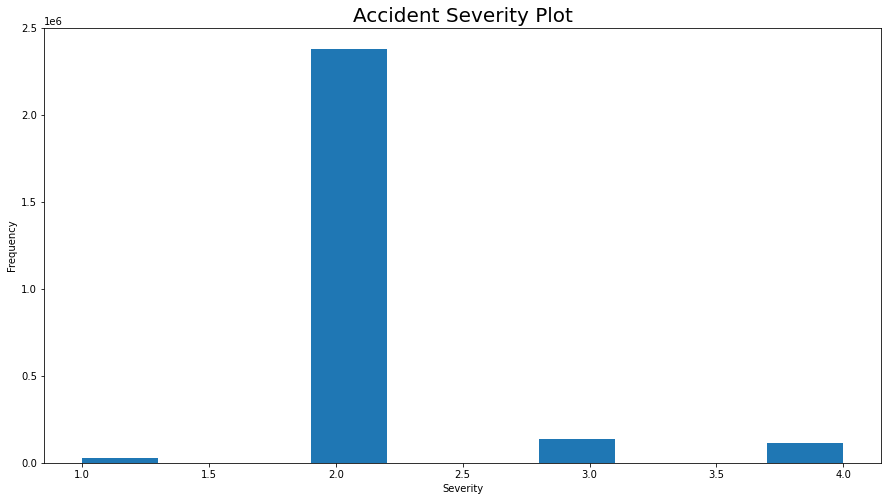

In [18]:
# Accident Severity Plot
plt.subplots(figsize=(15,8))
data.Severity.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.title('Accident Severity Plot', fontsize = 20)

plt.show()

**Observation: Majority of the accident that occurred had a level 2 severity**

## Accident Analysis Based on Location

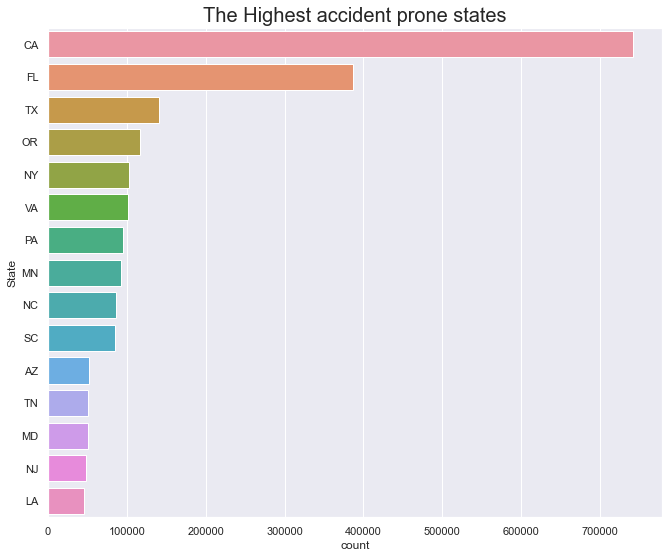

In [19]:
# 15 most accident prone states 
state_count15=data["State"].value_counts().sort_values(ascending=False)[:15]
sns.set_style('white')
sns.set(rc={'figure.figsize':(11,9)})
sns.barplot(x=state_count15.values,y= state_count15.index)
plt.xlabel('count')
plt.ylabel('State')
plt.title("The Highest accident prone states", fontsize=20)
plt.show()

**The most accidents were reported in California, followed by Florida (FL)**

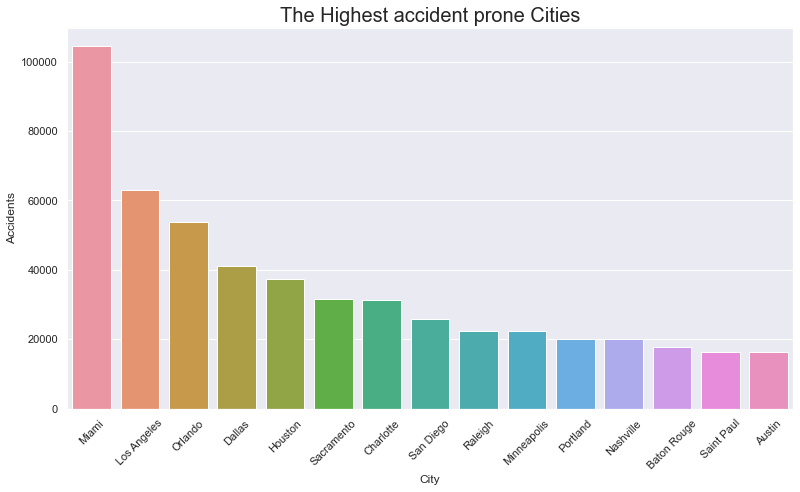

In [20]:
# 15 most accident prone cities 
city_count= data.City.value_counts()
fig,axs= plt.subplots(figsize=(13,7))
sns.countplot(x="City",order= city_count.index[:15],data= data)
plt.ylabel('Accidents')
plt.xticks(rotation=45)
plt.title('The Highest accident prone Cities',fontsize=20)
plt.show()

**Most accidents occurred in Miami, Florida, followed by Los Angeles, Califonia**

## Accident analysis based on Time

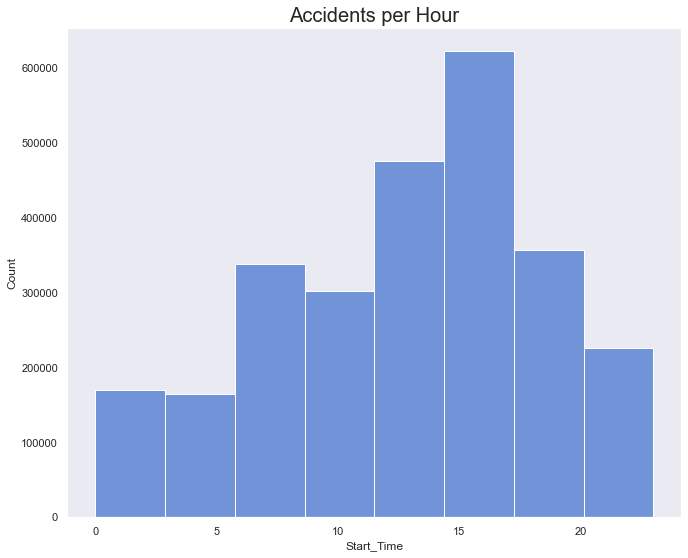

In [21]:
data['Start_Time']= pd.to_datetime(data.Start_Time)

#Accidents that happen on an hourly base
Accidents_hr=data.Start_Time.dt.hour
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(Accidents_hr,bins= 8)
plt.title('Accidents per Hour',fontsize=20);

**Majority of the accidents occurred during 15pm- 17pm**

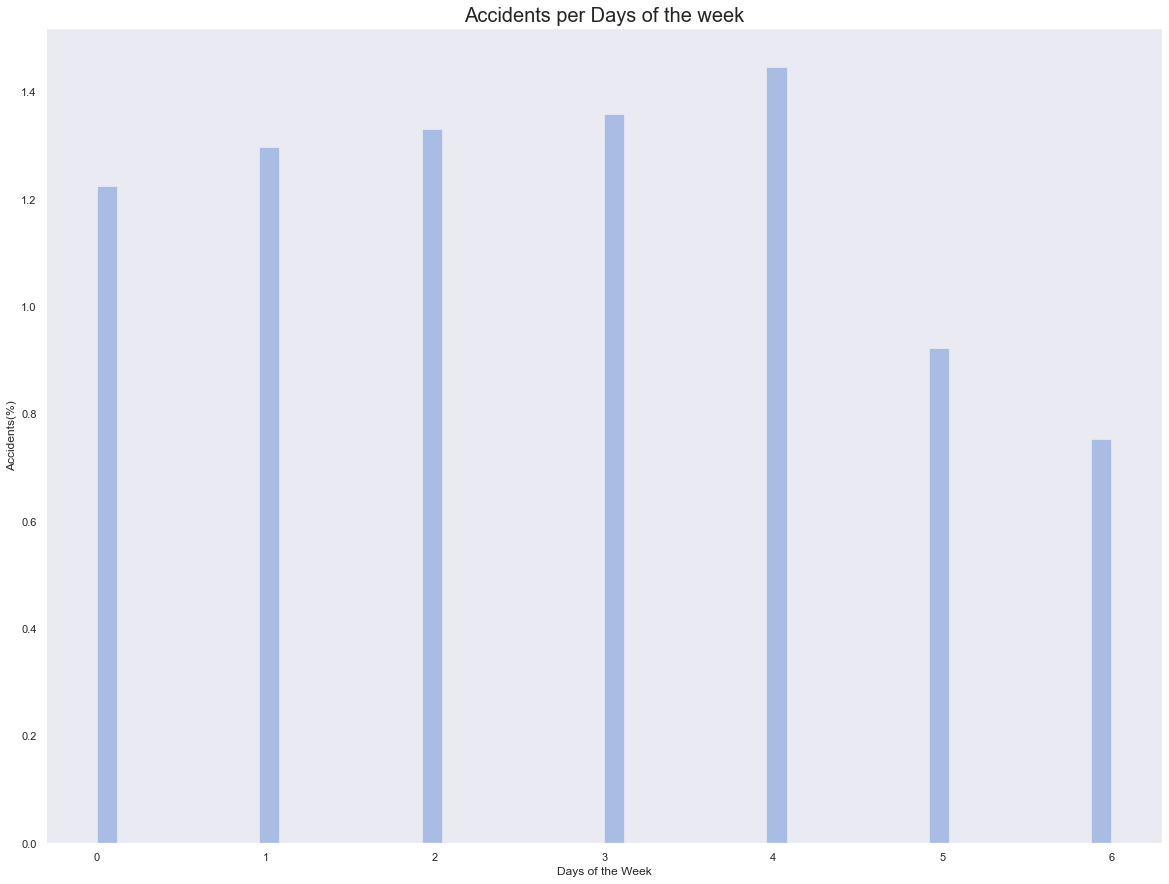

In [22]:
# Returns the day of the week, MONDAY= 0,TUESDAY=1,WEDNESDAY=2,THURSDAY=3,FRIDAY=4,SATURDAY=5,SUNDAY=6
Days_of_week= data.Start_Time.dt.dayofweek

# Accidents that occurred by days of the week
plt.figure(figsize=(20,15))
sns.distplot(Days_of_week,norm_hist= True,kde=False)
plt.xlabel('Days of the Week')
plt.ylabel('Accidents(%)')
plt.title('Accidents per Days of the week', fontsize = 20)
plt.show()

**The majority of the accident occured on a Friday**

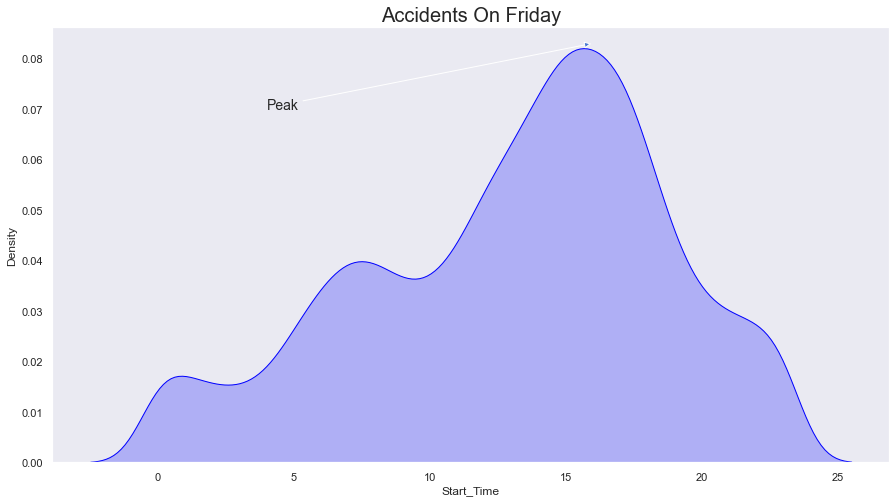

In [23]:
#At what time on Friday does most of the accidents occur
fridays=data[data.Start_Time.dt.dayofweek==4]
plt.subplots(figsize=(15,8))
sns.kdeplot(fridays.Start_Time.dt.hour,fill=True,bw_adjust=2,color='blue',data=fridays);
plt.annotate('Peak',xy=(16,0.083),xytext=(4,0.07),arrowprops={'arrowstyle':'-|>'},fontsize= 14)
plt.title('Accidents On Friday',fontsize = 20)
plt.show()

**The accidents that happened on fridays**

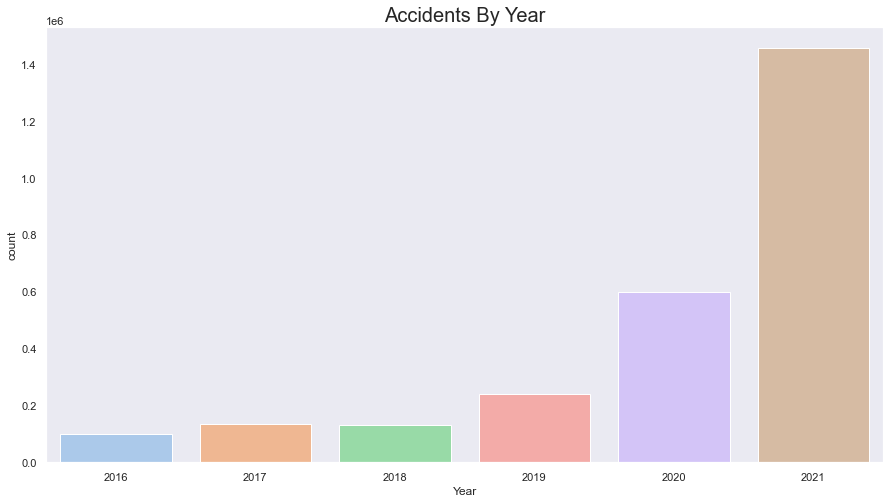

In [24]:
#Accidents by year
data['Year']=data.Start_Time.dt.year
plt.subplots(figsize=(15,8))
sns.countplot(x='Year',data=data,palette = 'pastel' );
for i in axs.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.70
    y = i.get_height()+11500
    axs.annotate(count, (x, y))
plt.title("Accidents By Year",fontsize = 20)
plt.show()

**Majority of the accidents occured in year 2021 with approximately 1.4 million**

In [25]:
#number of accidents that occured per month
data['Month']=data.Start_Time.dt.month
data.Month= data.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.Month.value_counts().sort_values(ascending=False)

Dec    447321
Nov    336055
Oct    281195
Sep    224823
Jun    212764
Jan    181380
Feb    180071
May    171301
Aug    164959
Apr    162635
Mar    146702
Jul    146677
Name: Month, dtype: int64

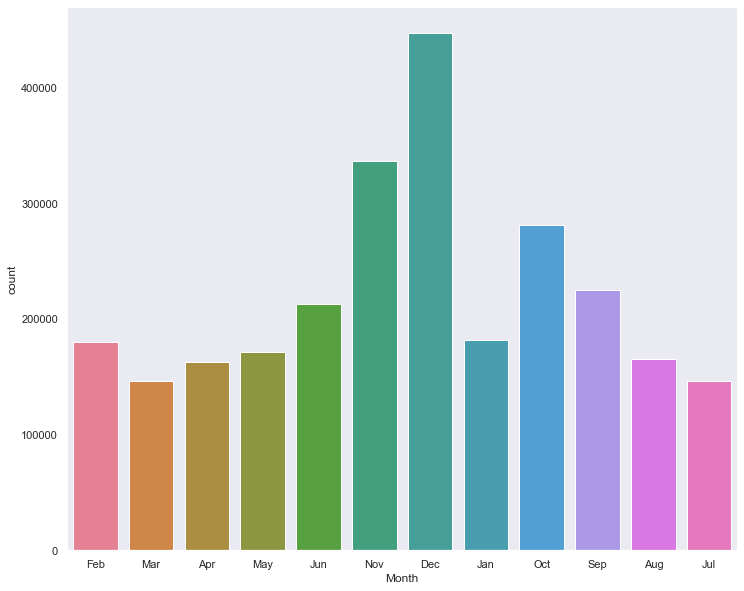

In [26]:
#visualization of the number of accidents that occured per month
plt.subplots(figsize=(12,10))
sns.countplot(x='Month', data=data,palette="husl")
for n in axs.patches:
    x= n.get_x()+i.get_width()-0.85
    y= n.get_height()+ 10000
    count= '{:,.0f}'.format(i.get_height())
axs.set(xlabel='Month',ylabel='Count',title='Accidents by month')
plt.show();

**Majority of the accidents occured in December this could be due to the fact that it was celebration season**

# Accident Analysis based on Place

In [27]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month'],
      dtype='object')

In [28]:
#Dataframe to hold the  places that accidents occurred
place = data.iloc[:, 27:39]
place.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Traffic_Signal')

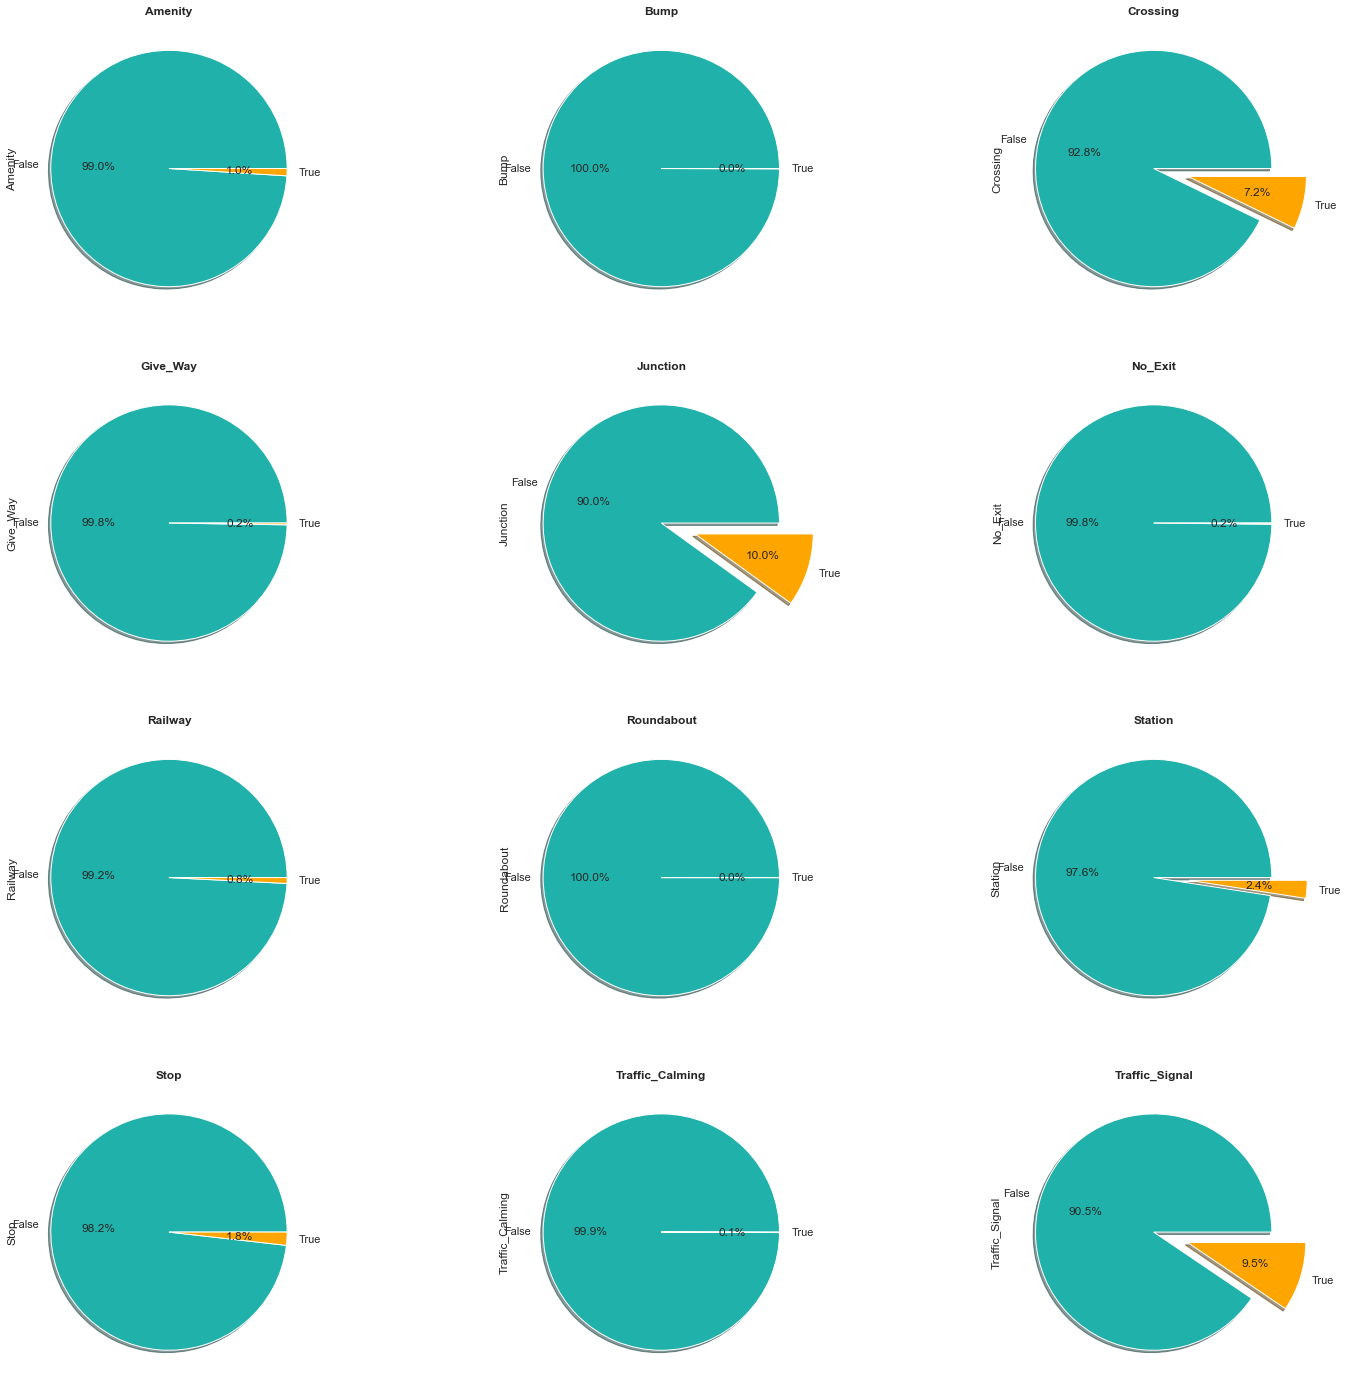

In [29]:
#Visualization of the percentage of accidents that occured in a place
f,ax=plt.subplots(4,3,figsize=(25,25))
explode = [0,0.3]

ax[0,0] = place['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["lightseagreen","orange"],shadow = True)
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = place['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["lightseagreen","orange"],shadow = True)
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = place['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["lightseagreen","orange"],explode=explode,shadow = True)
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = place['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["lightseagreen","orange"],shadow = True)
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = place['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["lightseagreen","orange"],explode=explode,shadow = True)
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = place['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["lightseagreen","orange"],shadow = True)
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = place['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["lightseagreen","orange"],shadow = True)
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = place['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["lightseagreen","orange"],shadow = True)
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = place['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["lightseagreen","orange"],explode=explode,shadow = True)
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = place['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["lightseagreen","orange"],shadow = True)
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = place['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["lightseagreen","orange"],shadow = True)
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = place['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["lightseagreen","orange"],explode=explode,shadow = True)
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")

**This shows that about 10% of accidents occurred at junctions,7.2% at Crossings, 2.4% at stations ,9.5% at Traffic signals and 1.8% at stops.**

# Accident Severity analysis based on Weather

<AxesSubplot:xlabel='Sunrise_Sunset', ylabel='count'>

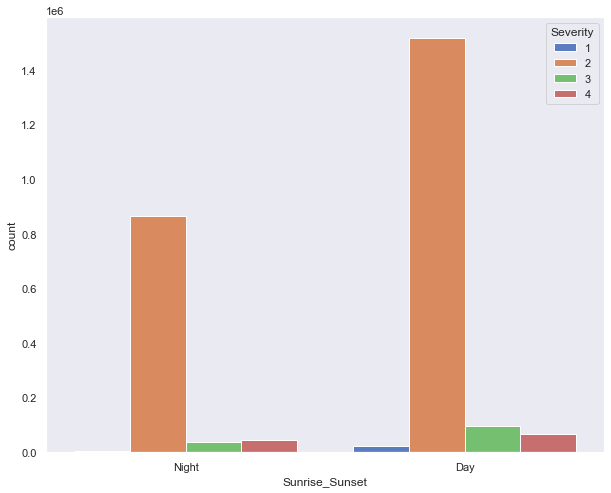

In [30]:
# Accidents that occured during the Day or Night
plt.subplots(figsize=(10,8))
sns.countplot(x='Sunrise_Sunset',hue= 'Severity', data=data)

**This shows that most accidents happened during the day**

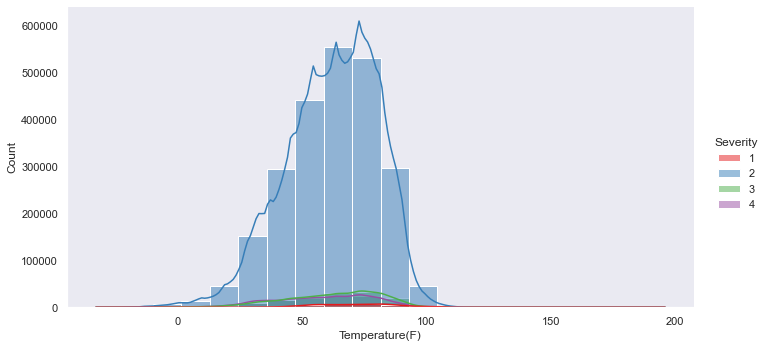

In [31]:
sns.displot(data, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

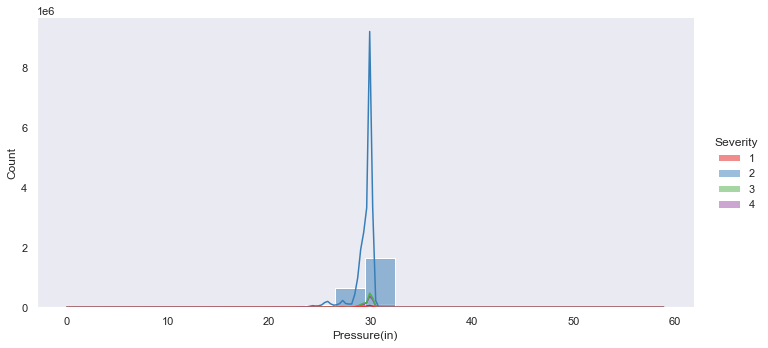

In [32]:
sns.displot(data, x="Pressure(in)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

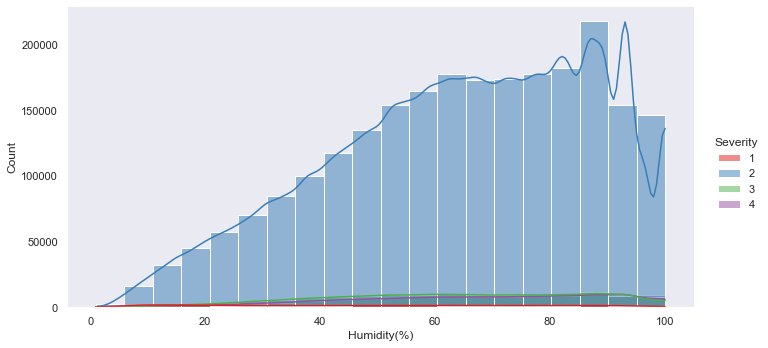

In [33]:
sns.displot(data, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

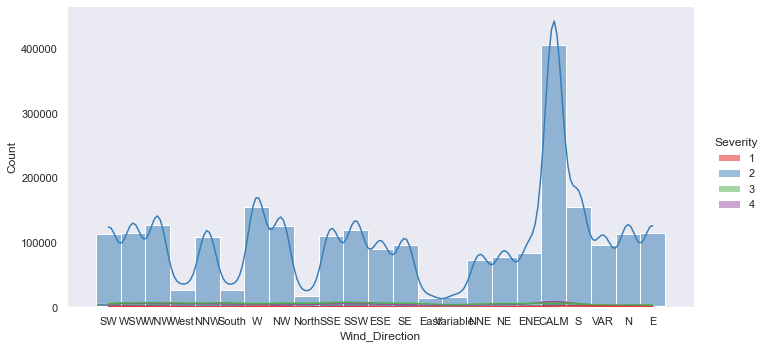

In [34]:
sns.displot(data, x="Wind_Direction", hue="Severity", palette="Set1", height=5, aspect=2,bins=10,kde=True);

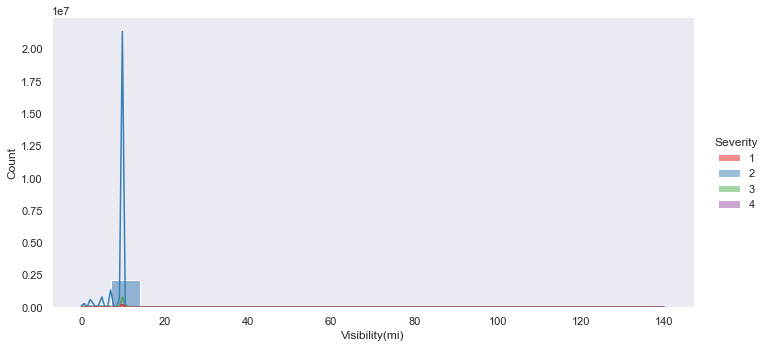

In [35]:
sns.displot(data, x="Visibility(mi)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True);

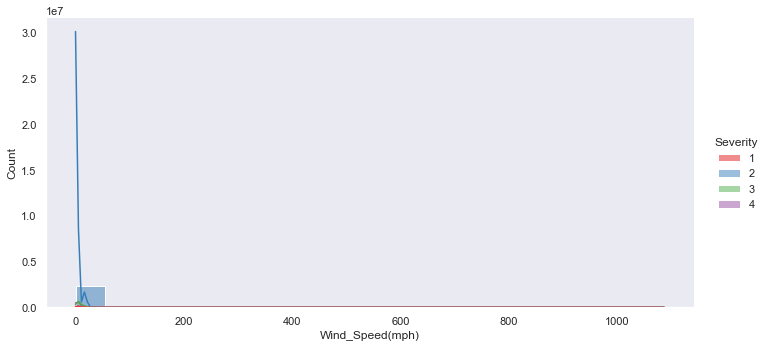

In [36]:
sns.displot(data, x="Wind_Speed(mph)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)

<AxesSubplot:xlabel='Weather_Condition', ylabel='count'>

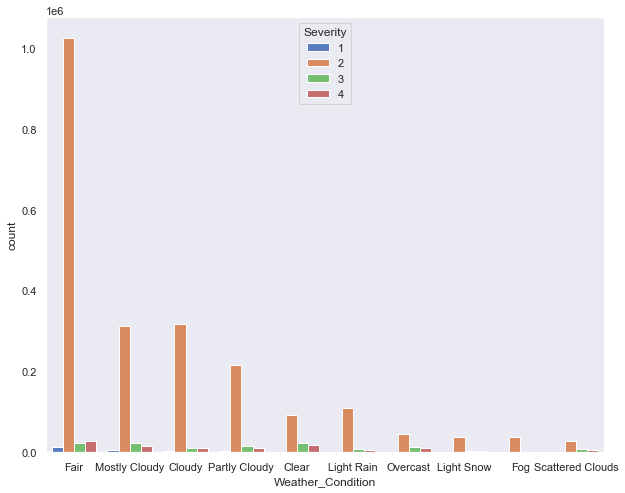

In [37]:
Weather_count= data.Weather_Condition.value_counts()
plt.subplots(figsize=(10,8))
sns.countplot(x="Weather_Condition",hue= 'Severity',order= Weather_count.index[:10], data=data)

**The majority of the accidents occurred during good weather and during the day, and the severity level of the bulk of the accidents was level 2.**

## 6. Data Pre-processing

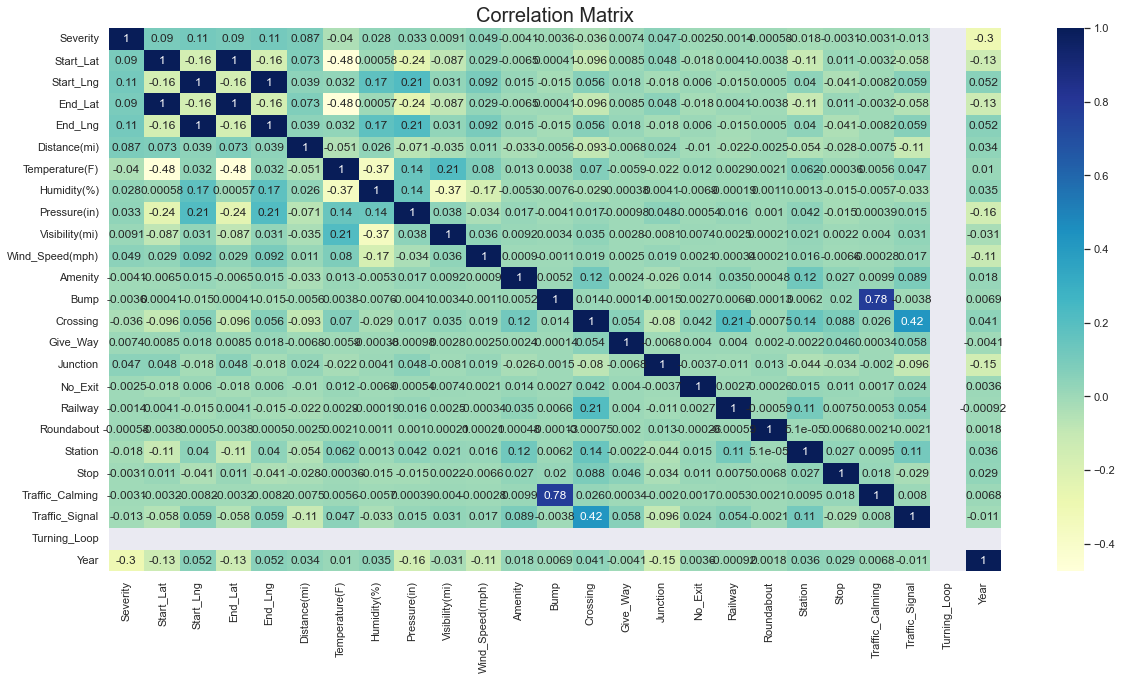

Roundabout         0.000581
Railway            0.001362
No_Exit            0.002527
Traffic_Calming    0.003053
Stop               0.003143
Bump               0.003640
Amenity            0.004076
Give_Way           0.007401
Visibility(mi)     0.009082
Traffic_Signal     0.012703
Station            0.017692
Humidity(%)        0.027761
Pressure(in)       0.032609
Crossing           0.035997
Temperature(F)     0.040047
Junction           0.046698
Wind_Speed(mph)    0.048535
Distance(mi)       0.087426
End_Lat            0.090299
Start_Lat          0.090300
Start_Lng          0.111607
End_Lng            0.111608
Year               0.300703
Severity           1.000000
Turning_Loop            NaN
Name: Severity, dtype: float64


In [38]:
# Checking the correlation between the numerical features
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

print (data.corr()['Severity'].abs().sort_values())

In [39]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year',
       'Month'],
      dtype='object')

In [40]:
# removing certain columns that I don't think are required.
data.drop(['Start_Time','End_Time','Description','Zipcode','Country','Timezone','Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis = 1, inplace=True)

In [41]:
data


,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month
0,A-1,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,Dublin,...,False,False,False,False,False,False,False,Night,2016,Feb
4,A-5,3,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,False,Day,2016,Feb
5,A-6,2,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,R,Williamsburg,...,False,False,False,False,False,True,False,Day,2016,Feb
6,A-7,2,39.775650,-84.186030,39.772750,-84.188050,0.227,I-75 S,R,Dayton,...,False,False,False,False,False,False,False,Day,2016,Feb
7,A-8,2,41.375310,-81.820170,41.367860,-81.821740,0.521,I-71 S,R,Cleveland,...,False,False,False,False,False,False,False,Day,2016,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,34.002480,-117.379360,33.998880,-117.370940,0.543,Pomona Fwy E,R,Riverside,...,False,False,False,False,False,False,False,Day,2019,Aug
2845338,A-2845339,2,32.766960,-117.148060,32.765550,-117.153630,0.338,I-8 W,R,San Diego,...,False,False,False,False,False,False,False,Day,2019,Aug
2845339,A-2845340,2,33.775450,-117.847790,33.777400,-117.857270,0.561,Garden Grove Fwy,R,Orange,...,False,False,False,False,False,False,False,Day,2019,Aug
2845340,A-2845341,2,33.992460,-118.403020,33.983110,-118.395650,0.772,San Diego Fwy S,R,Culver City,...,False,False,False,False,False,False,False,Day,2019,Aug


In [42]:
#Showing all the columns
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month
0,A-1,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,Dublin,Franklin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016,Feb
4,A-5,3,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,Cincinnati,Hamilton,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016,Feb
5,A-6,2,39.063240,-84.032430,39.067310,-84.058510,1.427,State Route 32,R,Williamsburg,Clermont,OH,2016-02-08 08:16:00,35.6,100.0,29.66,10.0,WSW,8.1,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,2016,Feb
6,A-7,2,39.775650,-84.186030,39.772750,-84.188050,0.227,I-75 S,R,Dayton,Montgomery,OH,2016-02-08 08:18:00,33.8,100.0,29.63,3.0,SW,2.3,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016,Feb
7,A-8,2,41.375310,-81.820170,41.367860,-81.821740,0.521,I-71 S,R,Cleveland,Cuyahoga,OH,2016-02-08 11:51:00,33.1,92.0,29.63,0.5,SW,3.5,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,2016,Feb


## Feature Distribution

In [43]:
# Defining the X and y features
X = data.drop(columns='Severity')
y = data['Severity']

In [44]:
# Grouping the data into Numerical and categorical features
numerical_features = list()
categorical_features = list()
for column in X.columns:
    # In the dataset we only have float and int64.
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    # Categorical
    elif (data[column].dtype == 'object' or data[column].dtype == 'bool'):
        categorical_features.append(column)
        
print('There are a total of {} numerical features in the dataset.'.format(len(numerical_features)))
print('There are a total of {} categorical features in the dataset.'.format(len(categorical_features)))

There are a total of 11 numerical features in the dataset.
There are a total of 24 categorical features in the dataset.


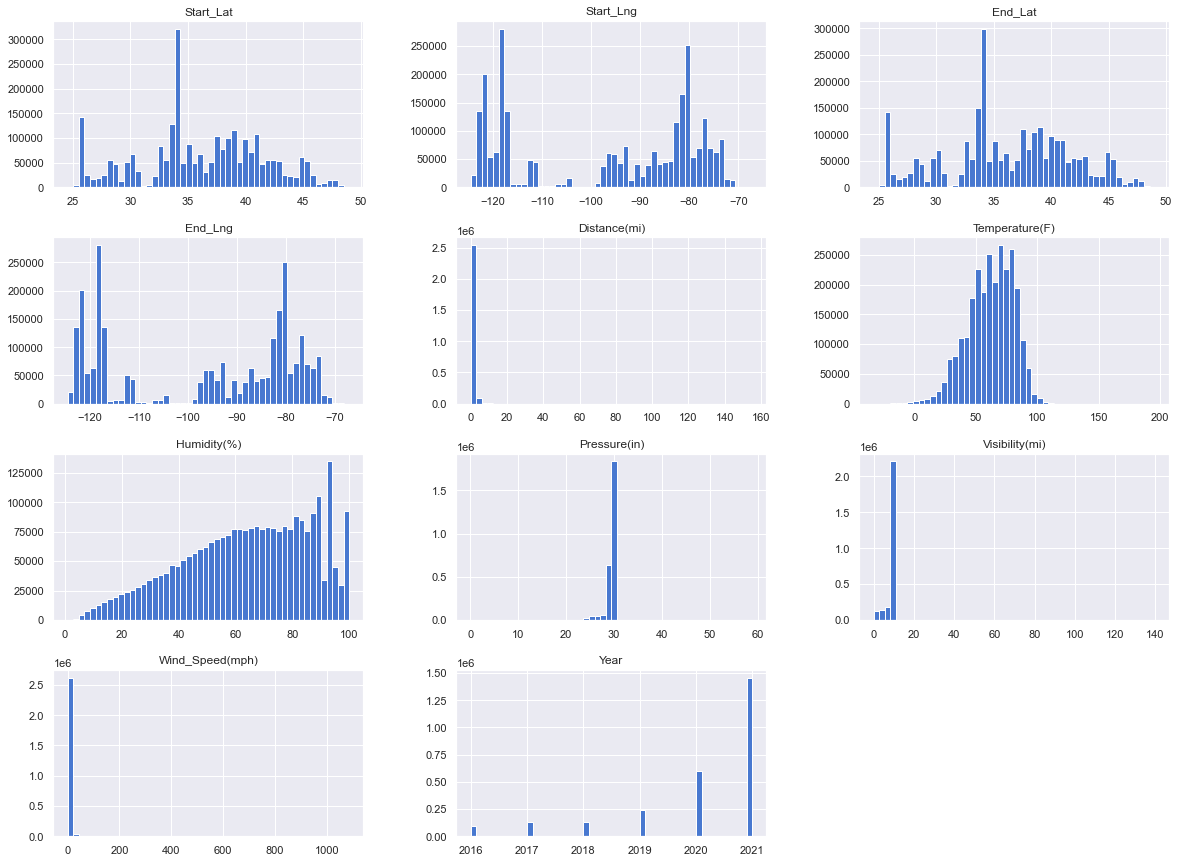

In [45]:
# Visualization of all the numerical Features
X_num_total = X[numerical_features]
X_num_total.hist(bins=50,figsize=(20, 15))
plt.show()

In [46]:
X_cat_total = X[categorical_features]
print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

Unique values for each categorical column are:
 ID                   2655883
Street                154064
Side                       2
City                   10788
County                  1668
State                     49
Weather_Timestamp     444273
Wind_Direction            23
Weather_Condition        123
Amenity                    2
Bump                       2
Crossing                   2
Give_Way                   2
Junction                   2
No_Exit                    2
Railway                    2
Roundabout                 2
Station                    2
Stop                       2
Traffic_Calming            2
Traffic_Signal             2
Turning_Loop               1
Sunrise_Sunset             2
Month                     12
dtype: int64


In [47]:
#dropping columns with too many unique values
X_cat_total.drop(['ID','Street','Weather_Timestamp','City','County'], axis=1, inplace=True)

In [48]:
X_cat_total

,Side,State,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Month
0,R,OH,SW,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Feb
4,R,OH,WSW,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Feb
5,R,OH,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Feb
6,R,OH,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Feb
7,R,OH,SW,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,R,CA,W,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Aug
2845338,R,CA,SW,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Aug
2845339,R,CA,SSW,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Aug
2845340,R,CA,SW,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Aug


## Label Encoding

**Since machine learning algorithms deal with numerical values, and our data contains categorical values (of object type), we utilised label encoding to convert all categorical values to numerical values before starting the split, test, and train process.**

In [49]:
# categorical feature list
categorical_features_index = list()
# Encode categorical features, get the indexes of categorical 
for p in categorical_features:
    categorical_features_index.append(X.columns.get_loc(p))
    X[p] = LabelEncoder().fit_transform(X[p])

In [50]:
X.head()

,ID,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,County,State,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month
0,0,40.108910,-83.092860,40.112060,-83.031870,3.230,137194,1,2576,536,33,1,42.1,58.0,29.76,10.0,15,10.4,55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2016,3
4,2128797,39.172393,-84.492792,39.170476,-84.501798,0.500,125805,1,1742,640,33,2,37.0,93.0,29.69,10.0,21,10.4,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016,3
5,2234062,39.063240,-84.032430,39.067310,-84.058510,1.427,146431,1,10527,317,33,3,35.6,100.0,29.66,10.0,21,8.1,77,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2016,3
6,2339481,39.775650,-84.186030,39.772750,-84.188050,0.227,125805,1,2323,1009,33,4,33.8,100.0,29.63,3.0,15,2.3,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2016,3
7,2445014,41.375310,-81.820170,41.367860,-81.821740,0.521,125792,1,1820,389,33,5,33.1,92.0,29.63,0.5,15,3.5,99,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2016,3


In [51]:
 y = LabelEncoder().fit_transform(y) 

## Split, Test and Train

**The dataset was divided in half, with 70% going to training and 30% going to testing**

In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

len(X_train), len(X_test)

(1859118, 796765)

## Normalization 

In [53]:
scale= StandardScaler()
X_train_standard= scale.fit_transform(X_train)
X_test_standard= scale.fit_transform(X_test)

In [54]:
len(X_train_standard), len(y_train)

(1859118, 1859118)

# 7. Machine Learning Model Building

**The following supervised learning algorithms will be used for the classification:**

         •    Multinomial Logistics Regression
         •    Random Forest Classifier
         •    Decision Tree Classifier
         •    Multilayer Perceptron (MLP) Classifier


## 1. Multinomial Logistics Regression

In [55]:
#Creating an instance of a Logistics Regression Classifier
LR= LogisticRegression(C=1.0,solver='lbfgs',multi_class='multinomial')

#Training the Model using the training set
LR.fit(X_train_standard,y_train)
LR

LogisticRegression(multi_class='multinomial')

In [56]:
# Predicting and training the model on the Test set
LR_predict_train=LR.predict(X_train_standard)
LR_predict_test=LR.predict(X_test)

In [57]:
#Checking the Accuracy score of the test and the train set
print('Prediction on training set', accuracy_score(y_train,LR_predict_train))
print('Prediction on testing set', accuracy_score(y_test,LR_predict_test))

Prediction on training set 0.8964691859257993
Prediction on testing set 0.7837153991452938


# Feature Importance

In [58]:
FeatureImportance= LR.coef_[0]
for i,d in enumerate(FeatureImportance):
	print('Feature: %0d, Score: %.5f' % (i,d))

Feature: 0, Score: -0.31970
Feature: 1, Score: 0.02292
Feature: 2, Score: -0.13292
Feature: 3, Score: 0.02586
Feature: 4, Score: -0.13333
Feature: 5, Score: -0.37977
Feature: 6, Score: 0.02872
Feature: 7, Score: 0.02185
Feature: 8, Score: 0.16180
Feature: 9, Score: -0.04954
Feature: 10, Score: 0.03715
Feature: 11, Score: -3.63374
Feature: 12, Score: 0.80106
Feature: 13, Score: 0.02280
Feature: 14, Score: -0.11058
Feature: 15, Score: -0.02636
Feature: 16, Score: -0.00108
Feature: 17, Score: -0.03251
Feature: 18, Score: -0.03515
Feature: 19, Score: 0.00129
Feature: 20, Score: 0.01057
Feature: 21, Score: 0.17059
Feature: 22, Score: -0.00743
Feature: 23, Score: 0.06956
Feature: 24, Score: 0.01244
Feature: 25, Score: -0.00123
Feature: 26, Score: 0.01334
Feature: 27, Score: -0.01772
Feature: 28, Score: 0.02892
Feature: 29, Score: -0.00564
Feature: 30, Score: 0.26879
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.24808
Feature: 33, Score: 3.77537
Feature: 34, Score: -0.08393


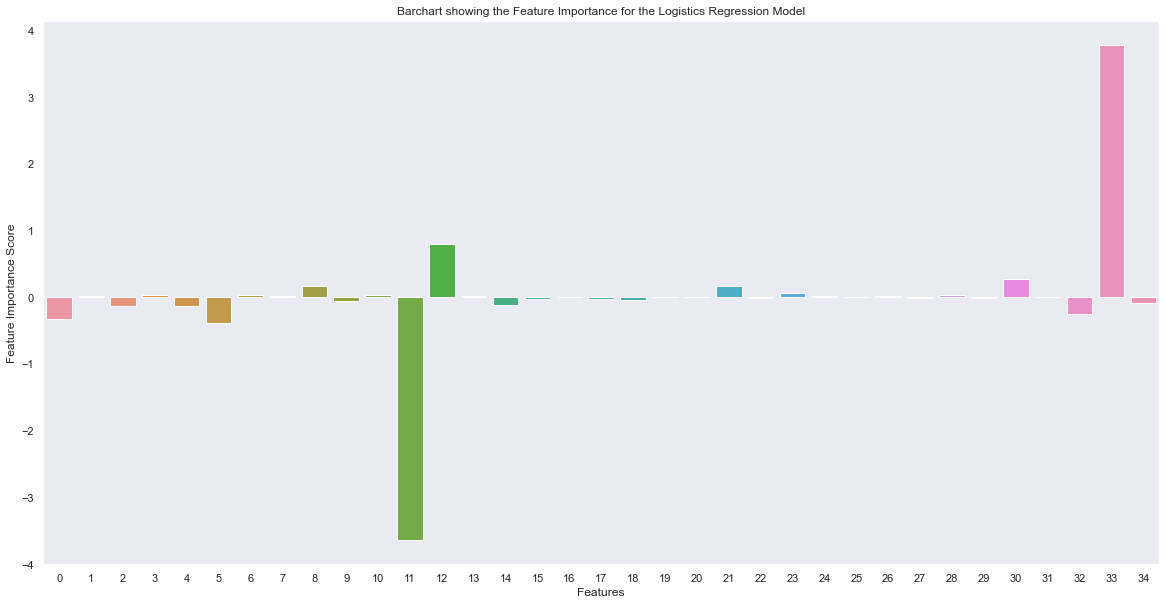

In [59]:
#Creating a barplot to visualize the feature importance
plt.subplots(figsize=(20,10))
sns.barplot([X for X in range(len(FeatureImportance))], FeatureImportance)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Barchart showing the Feature Importance for the Logistics Regression Model')
plt.show()

### Feature Selection

In [60]:
cols= ['City','Temperature(F)', 'Crossing','Junction','Traffic_Signal','Year']
X_new= X[cols]
y_new= y

In [61]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( X_new, y_new, test_size=0.3, random_state=4)

In [62]:
scale= StandardScaler()
X_new_train_standard= scale.fit_transform(X_new_train)
X_new_test_standard= scale.fit_transform(X_new_test)

In [63]:
len(X_new_train_standard), len(y_new_train)

(1859118, 1859118)

In [64]:
Final_LR= LogisticRegression(C=1.0,solver='lbfgs',multi_class='multinomial')

#Training the Model using the training set
Final_LR.fit(X_new_train_standard,y_new_train)
Final_LR

LogisticRegression(multi_class='multinomial')

In [65]:
# Predicting and training the model on the Test set
LR_new_predict_train=Final_LR.predict(X_new_train_standard)
LR_new_predict_test=Final_LR.predict(X_new_test_standard)
#Checking the Accuracy score of the test and the train set
print('Prediction on training set', accuracy_score(y_new_train,LR_new_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,LR_new_predict_test))

Prediction on training set 0.8961389217897949
Prediction on testing set 0.8963722051043909


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_new_test,LR_new_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7676
           1       0.90      1.00      0.95    714880
           2       0.17      0.00      0.01     40665
           3       0.00      0.00      0.00     33544

    accuracy                           0.90    796765
   macro avg       0.27      0.25      0.24    796765
weighted avg       0.81      0.90      0.85    796765



In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_new_test, LR_new_predict_test)
print(confusion_matrix)

[[     0   7676      0      0]
 [     0 713997    883      0]
 [     0  40464    201      0]
 [     0  33436    108      0]]


# 2. RANDOM FOREST

In [68]:
#RandomForest 1

RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train_standard,y_train)
RF

RandomForestClassifier(max_depth=2, random_state=0)

In [69]:
RF_predict_train=RF.predict(X_train_standard)
RF_predict_test=RF.predict(X_test)

print('Prediction on training set', accuracy_score(y_train,RF_predict_train))
print('Prediction on testing set', accuracy_score(y_test,RF_predict_test))

Prediction on training set 0.8969801809245029
Prediction on testing set 0.8972281663978714


In [70]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Weather_Timestamp,0.240
Year,0.188
ID,0.104
Weather_Condition,0.092
Start_Lng,0.069
State,0.065
End_Lng,0.050
Start_Lat,0.044
Distance(mi),0.043


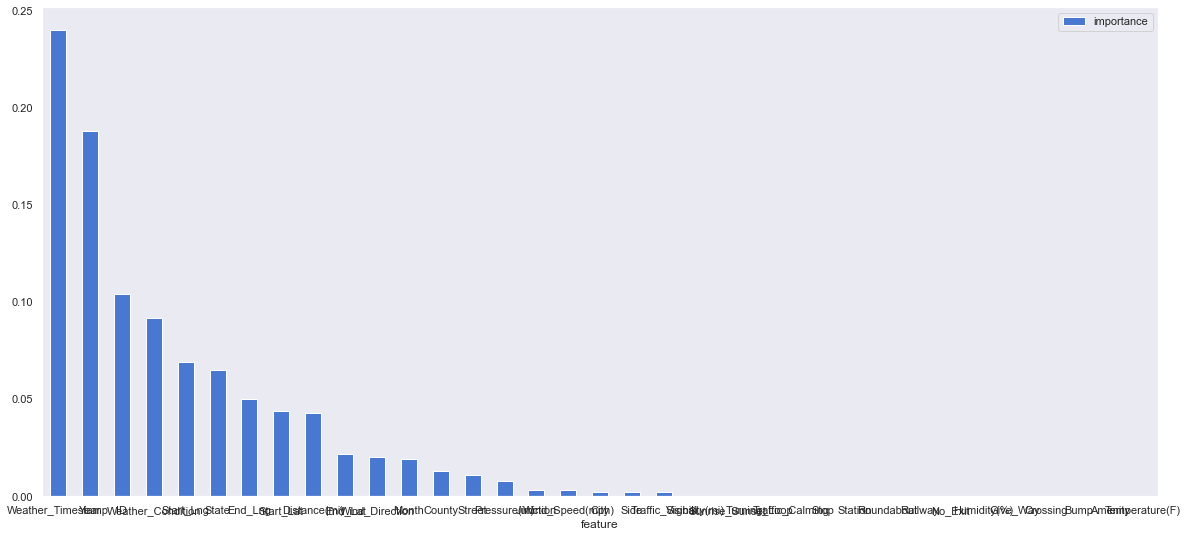

In [71]:
ax = importances.plot.bar( rot=0,figsize=(20,9))

In [105]:
cols= ['ID','Weather_Condition','Weather_Timestamp','Start_Lng','State','End_Lng','Start_Lat','Distance(mi)','End_Lat','Wind_Direction','Month','County','Street','Year']
X_new= X[cols]
y_new= y

In [106]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( X_new, y_new, test_size=0.3, random_state=4)

In [107]:
scale= StandardScaler()
X_new_train_standard= scale.fit_transform(X_new_train)
X_new_test_standard= scale.fit_transform(X_new_test)

In [108]:
len(X_new_train_standard), len(y_new_train)

(1859118, 1859118)

In [109]:
RF2= RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
RF2.fit(X_new_train_standard,y_new_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)

In [110]:
RF2_predict_train=RF2.predict(X_new_train_standard)
RF2_predict_test=RF2.predict(X_new_test)

print('Prediction on training set', accuracy_score(y_new_train,RF2_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,RF2_predict_test))

Prediction on training set 0.9999806359789964
Prediction on testing set 0.8972281663978714


In [111]:
RF3=  RandomForestClassifier(n_estimators=50, max_features=5, max_depth =10 ,criterion='entropy',random_state=0, n_jobs=-1)
RF3.fit(X_new_train_standard,y_new_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5,
                       n_estimators=50, n_jobs=-1, random_state=0)

In [112]:
RF3_predict_train=RF3.predict(X_new_train_standard)
RF3_predict_test=RF3.predict(X_new_test)

print('Prediction on training set', accuracy_score(y_new_train,RF3_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,RF3_predict_test))

Prediction on training set 0.9159149661291
Prediction on testing set 0.8972281663978714


In [113]:
RF4=  RandomForestClassifier(n_estimators=10, max_features=8, max_depth =12,criterion='entropy',random_state=0, n_jobs=-1)
RF4.fit(X_new_train_standard,y_new_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=8,
                       n_estimators=10, n_jobs=-1, random_state=0)

In [114]:
RF4_predict_train=RF4.predict(X_new_train_standard)
RF4_predict_test=RF4.predict(X_new_test)

print('Prediction on training set', accuracy_score(y_new_train,RF4_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,RF4_predict_test))

Prediction on training set 0.9203982748808843
Prediction on testing set 0.8972281663978714


In [115]:
RF5=  RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0, n_jobs=-1)
RF5.fit(X_new_train_standard,y_new_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, n_jobs=-1,
                       random_state=0)

In [116]:
RF5_predict_train=RF5.predict(X_new_train_standard)
RF5_predict_test=RF5.predict(X_new_test)

print('Prediction on training set', accuracy_score(y_new_train,RF5_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,RF5_predict_test))

Prediction on training set 0.9977812059266814
Prediction on testing set 0.8972281663978714


In [117]:
print(classification_report(y_new_test,RF2_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7676
           1       0.90      1.00      0.95    714880
           2       0.00      0.00      0.00     40665
           3       0.00      0.00      0.00     33544

    accuracy                           0.90    796765
   macro avg       0.22      0.25      0.24    796765
weighted avg       0.81      0.90      0.85    796765



In [85]:
from sklearn.metrics import confusion_matrix
RF_confusion_matrix = confusion_matrix(y_new_test, RF2_predict_test)
print(RF_confusion_matrix)

[[     0   7676      0      0]
 [     0 714880      0      0]
 [     0  40665      0      0]
 [     0  33544      0      0]]


# 3. Decision Tree

In [86]:
DT= DecisionTreeClassifier(criterion="entropy", random_state = 0) 
DT.fit(X_train_standard,y_train)
DT

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [87]:
DT_predict_train=RF.predict(X_train_standard)
DT_predict_test=RF.predict(X_test)
print('Prediction on training set', accuracy_score(y_train,DT_predict_train))
print('Prediction on testing set', accuracy_score(y_test,DT_predict_test))

Prediction on training set 0.8969801809245029
Prediction on testing set 0.8972281663978714


### Feature Importance 

In [88]:
importance = DT.feature_importances_
for x,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (x,v))


Feature: 0, Score: 0.05395
Feature: 1, Score: 0.04098
Feature: 2, Score: 0.04880
Feature: 3, Score: 0.04594
Feature: 4, Score: 0.08743
Feature: 5, Score: 0.08819
Feature: 6, Score: 0.05116
Feature: 7, Score: 0.00155
Feature: 8, Score: 0.02229
Feature: 9, Score: 0.01582
Feature: 10, Score: 0.03259
Feature: 11, Score: 0.30477
Feature: 12, Score: 0.03222
Feature: 13, Score: 0.03374
Feature: 14, Score: 0.03853
Feature: 15, Score: 0.00608
Feature: 16, Score: 0.02291
Feature: 17, Score: 0.02404
Feature: 18, Score: 0.01441
Feature: 19, Score: 0.00035
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00152
Feature: 22, Score: 0.00021
Feature: 23, Score: 0.00417
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00036
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00049
Feature: 28, Score: 0.00066
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00561
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00826
Feature: 33, Score: 0.00093
Feature: 34, Score: 0.01187


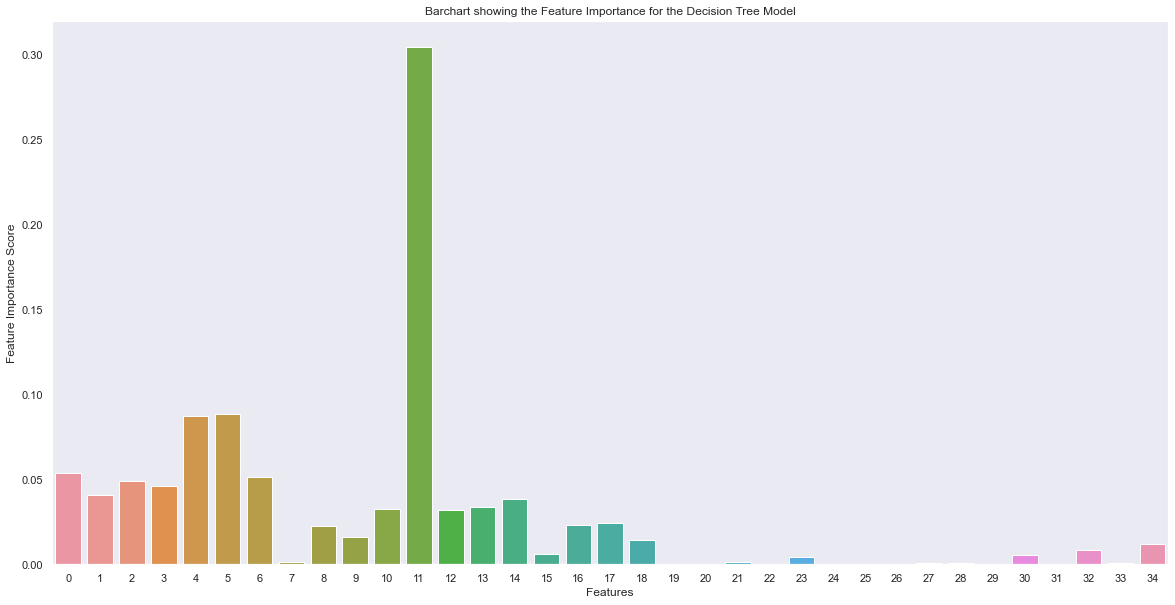

In [89]:
#Creating a barplot to visualize the feature importance
plt.subplots(figsize=(20,10))
sns.barplot([X for X in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Barchart showing the Feature Importance for the Decision Tree Model')
plt.show()

In [90]:
cols= ['City','ID','Weather_Condition','Weather_Timestamp','Start_Lng','State','End_Lng','Start_Lat','Distance(mi)','End_Lat','Wind_Direction','Temperature(F)','Humidity(%)', 'Month','County','Wind_Speed(mph)','Street','Pressure(in)','Visibility(mi)','Traffic_Signal','Sunrise_Sunset','Junction']
X_new= X[cols]
y_new= y

In [91]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( X_new, y_new, test_size=0.3, random_state=4)

In [92]:
scale= StandardScaler()
X_new_train_standard= scale.fit_transform(X_new_train)
X_new_test_standard= scale.fit_transform(X_new_test)

In [93]:
DT2= DecisionTreeClassifier(criterion='entropy', random_state=0)
DT2.fit(X_new_train_standard,y_new_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [94]:
DT2_predict_train=DT2.predict(X_new_train_standard)
DT2_predict_test=DT2.predict(X_new_test)

print('Prediction on training set', accuracy_score(y_new_train,DT2_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,DT2_predict_test))

Prediction on training set 1.0
Prediction on testing set 0.8972306765482921


In [95]:
DT3= DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=0)
DT3.fit(X_new_train_standard,y_new_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [96]:
DT3_predict_train=DT3.predict(X_new_train_standard)
DT3_predict_test=DT3.predict(X_new_test)

print('Prediction on training set', accuracy_score(y_new_train,DT3_predict_train))
print('Prediction on testing set', accuracy_score(y_new_test,DT3_predict_test))

Prediction on training set 1.0
Prediction on testing set 0.8972306765482921


In [97]:
print(classification_report(y_new_test,DT3_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7676
           1       0.90      1.00      0.95    714880
           2       0.00      0.00      0.00     40665
           3       1.00      0.00      0.00     33544

    accuracy                           0.90    796765
   macro avg       0.47      0.25      0.24    796765
weighted avg       0.85      0.90      0.85    796765



In [98]:
from sklearn.metrics import confusion_matrix
DT_confusion_matrix = confusion_matrix(y_new_test, DT3_predict_test)
print(DT_confusion_matrix)

[[     0   7676      0      0]
 [     0 714880      0      0]
 [     0  40665      0      0]
 [     0  33542      0      2]]


# 4. MLP Classifier Neural Network

In [99]:
MLP= MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train_standard,y_train)
MLP

MLPClassifier(max_iter=300, random_state=1)

In [100]:
MLP_predict_train=MLP.predict(X_train_standard)
MLP_predict_test=MLP.predict(X_test)
print('Prediction on training set', accuracy_score(y_train,MLP_predict_train))
print('Prediction on testing set', accuracy_score(y_test,MLP_predict_test))

Prediction on training set 0.9160940833233824
Prediction on testing set 0.8953907362898722


In [101]:
print(classification_report(y_test,MLP_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7676
           1       0.90      1.00      0.95    714880
           2       0.23      0.00      0.00     40665
           3       0.09      0.01      0.01     33544

    accuracy                           0.90    796765
   macro avg       0.31      0.25      0.24    796765
weighted avg       0.82      0.90      0.85    796765



In [102]:
MLP2= MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,solver='lbfgs')
MLP2.fit(X_train_standard,y_train)
MLP2

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [103]:
MLP2_predict_train=MLP.predict(X_train_standard)
MLP2_predict_test=MLP.predict(X_test)
print('Prediction on training set', accuracy_score(y_train,MLP2_predict_train))
print('Prediction on testing set', accuracy_score(y_test,MLP2_predict_test))

Prediction on training set 0.9160940833233824
Prediction on testing set 0.8953907362898722


In [104]:
print(classification_report(y_test,MLP2_predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7676
           1       0.90      1.00      0.95    714880
           2       0.23      0.00      0.00     40665
           3       0.09      0.01      0.01     33544

    accuracy                           0.90    796765
   macro avg       0.31      0.25      0.24    796765
weighted avg       0.82      0.90      0.85    796765

